## Install necessary library packages

In [1]:
install.packages("plyr")
install.packages("XML")
install.packages("RCurl")
install.packages("rlist")

library(ggplot2)
library(RCurl)
library(rlist)
library(plyr)
library(XML)
library(stringr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Read the IMDB Dataset and set the first two reviews from the dataset in review_1 and review_2

In [2]:
imdb_data <- read.csv("IMDBDataset.csv")
review_1 <- imdb_data$review[1]
review_2 <- imdb_data$review[2]

In [4]:
review_2

[1] "A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only \"has got all the polari\" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done."

## Define the positive and negative words from the files

In [6]:
# load the words
# what - the character type
# comment.char - ignore any sentence that begins with ';'
hu.liu.pos = scan('positive-words.txt', what='character', comment.char=';')
hu.liu.neg = scan('negative-words.txt', what='character', comment.char=';')

In [7]:
pos.words = hu.liu.pos
neg.words = hu.liu.neg

In [11]:
pos.words

[1] "a+"                   "abound"               "abounds"             
   [4] "abundance"            "abundant"             "accessable"          
   [7] "accessible"           "acclaim"              "acclaimed"           
  [10] "acclamation"          "accolade"             "accolades"           
  [13] "accommodative"        "accomodative"         "accomplish"          
  [16] "accomplished"         "accomplishment"       "accomplishments"     
  [19] "accurate"             "accurately"           "achievable"          
  [22] "achievement"          "achievements"         "achievible"          
  [25] "acumen"               "adaptable"            "adaptive"            
  [28] "adequate"             "adjustable"           "admirable"           
  [31] "admirably"            "admiration"           "admire"              
  [34] "admirer"              "admiring"             "admiringly"          
  [37] "adorable"             "adore"                "adored"              
  [40] "adorer"               "adoring"              "adoringly"           
  [43] "adroit"               "adroitly"             "adulate"             
  [46] "adulation"            "adulatory"            "advanced"            
  [49] "advantage"            "advantageous"         "advantageously"      
  [52] "advantages"           "adventuresome"        "adventurous"         
  [55] "advocate"             "advocated"            "advocates"           
  [58] "affability"           "affable"              "affably"             
  [61] "affectation"          "affection"            "affectionate"        
  [64] "affinity"             "affirm"               "affirmation"         
  [67] "affirmative"          "affluence"            "affluent"            
  [70] "afford"               "affordable"           "affordably"          
  [73] "afordable"            "agile"                "agilely"             
  [76] "agility"              "agreeable"            "agreeableness"       
  [79] "agreeably"            "all-around"           "alluring"            
  [82] "alluringly"           "altruistic"           "altruistically"      
  [85] "amaze"                "amazed"               "amazement"           
  [88] "amazes"               "amazing"              "amazingly"           
  [91] "ambitious"            "ambitiously"          "ameliorate"          
  [94] "amenable"             "amenity"              "amiability"          
  [97] "amiabily"             "amiable"              "amicability"         
 [100] "amicable"             "amicably"             "amity"               
 [103] "ample"                "amply"                "amuse"               
 [106] "amusing"              "amusingly"            "angel"               
 [109] "angelic"              "apotheosis"           "appeal"              
 [112] "appealing"            "applaud"              "appreciable"         
 [115] "appreciate"           "appreciated"          "appreciates"         
 [118] "appreciative"         "appreciatively"       "appropriate"         
 [121] "approval"             "approve"              "ardent"              
 [124] "ardently"             "ardor"                "articulate"          
 [127] "aspiration"           "aspirations"          "aspire"              
 [130] "assurance"            "assurances"           "assure"              
 [133] "assuredly"            "assuring"             "astonish"            
 [136] "astonished"           "astonishing"          "astonishingly"       
 [139] "astonishment"         "astound"              "astounded"           
 [142] "astounding"           "astoundingly"         "astutely"            
 [145] "attentive"            "attraction"           "attractive"          
 [148] "attractively"         "attune"               "audible"             
 [151] "audibly"              "auspicious"           "authentic"           
 [154] "authoritative"        "autonomous"           "available"           
 [157] "aver"                 "avid"               

## Define the sentiment score function

In [13]:
# takes every sentence and sentiments and score the sentiment and uses positive and negative words to do so
# in each sentence, we have a list of pos and neg words. we want to see, in that sentence, does it have the pos/neg word? if so then add/subtract to give scor
# .progess gives a progress bar to see where we're at in the analysis

score.sentiment = function(sentences, pos.words, neg.words, .progress='none')
{
    require(plyr)
    require(stringr)
    # we got a vector of sentences. plyr will handle a list or a vector as an "l" for us
    # we want a simple array of scores back, so we use "l" + "a" + "ply" = laply:
    scores = laply(sentences, function(sentence, pos.words, neg.words) {

        # MORPHOLOGICAL ANALYSIS
        # clean up sentences with R's regex-driven global substitute, gsub():
        sentence = gsub('[[:punct:]]', '', sentence)  # split by punctuation in sentence and remove
        sentence = gsub('[[:cntrl:]]', '', sentence)  # split by greater than, lesser than, etc., then remove
        sentence = gsub('\\d+', '', sentence) # any numbers are also removed from the sentence

        sentence = tolower(sentence) # and convert to lower case:

        # TOKENIZATION
        word.list = str_split(sentence, '\\s+')  # split into words. str_split is in the stringr package

        words = unlist(word.list)  # unlist() - flattens out a collection of words into a single vector (sometimes a list() is one level of hierarchy too much)

        # compare our words to the dictionaries of positive & negative terms
        # match() returns the position of the matched term or NA
        pos.matches = match(words, pos.words)
        neg.matches = match(words, neg.words)

        # we just want a TRUE/FALSE:
        pos.matches = !is.na(pos.matches)
        neg.matches = !is.na(neg.matches)
        # and conveniently enough, TRUE/FALSE will be treated as 1/0 by sum():

        score = sum(pos.matches) - sum(neg.matches)  # get the score!
        return(score)
    }, pos.words, neg.words, .progress=.progress)
    scores.df = data.frame(score=scores, text=sentences)
    return(scores.df)
}

## Try to find sentiment score for sample texts

In [14]:
sample = c("You're awesome and I love you", # awesome, love - score: +2
           "I hate and hate and hate.So angry. Die!", # our function should be able to remove the 2 periods and exclamation mark. hate*3 + angry > score: -4
           "Impressed and amazed: you are peerless in your achievement of unparalleled mediocrity.") # using positive words to describe something negative (sarcasm)

In [15]:
score.sentiment(sample, pos.words, neg.words)

score,text
<int>,<chr>
2,You're awesome and I love you
-4,I hate and hate and hate.So angry. Die!
4,Impressed and amazed: you are peerless in your achievement of unparalleled mediocrity.


## Get the sentiment scores for the 1st and 2nd Review

In [16]:
sum(score.sentiment(review_1, pos.words, neg.words)$score)

[1] -7

In [17]:
sum(score.sentiment(review_2, pos.words, neg.words)$score)

[1] 10

## Check the sentiment score for first 20 reviews in histogram

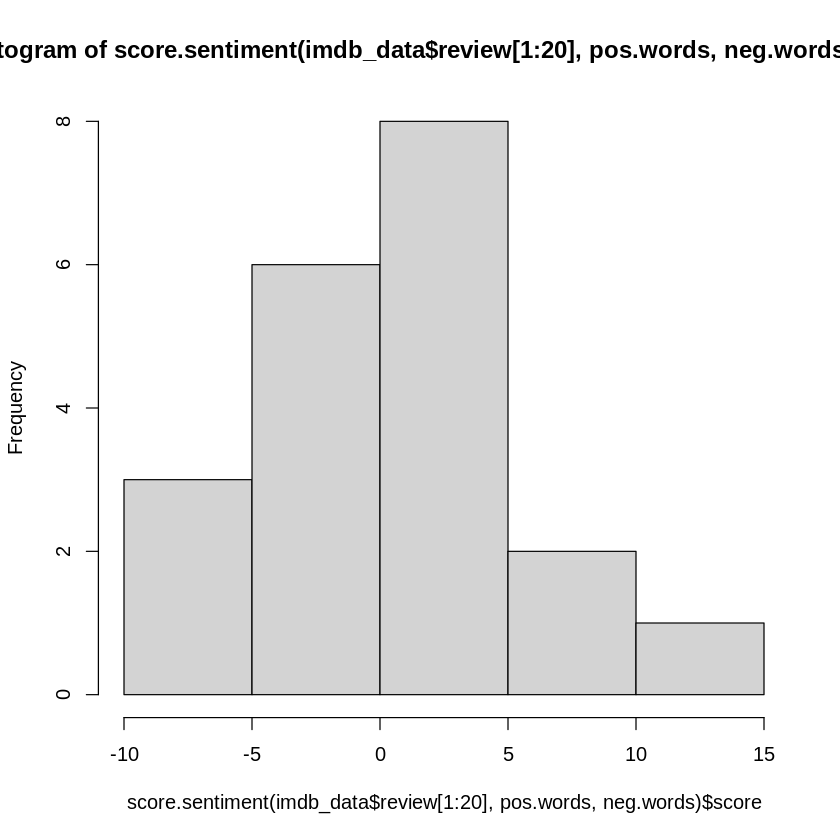

In [18]:
# taking the first 20 sentences in imdb_data and checking the scores, then plotting distribution
hist(score.sentiment(imdb_data$review[1:20], pos.words, neg.words)$score)

# there are more negative reviews

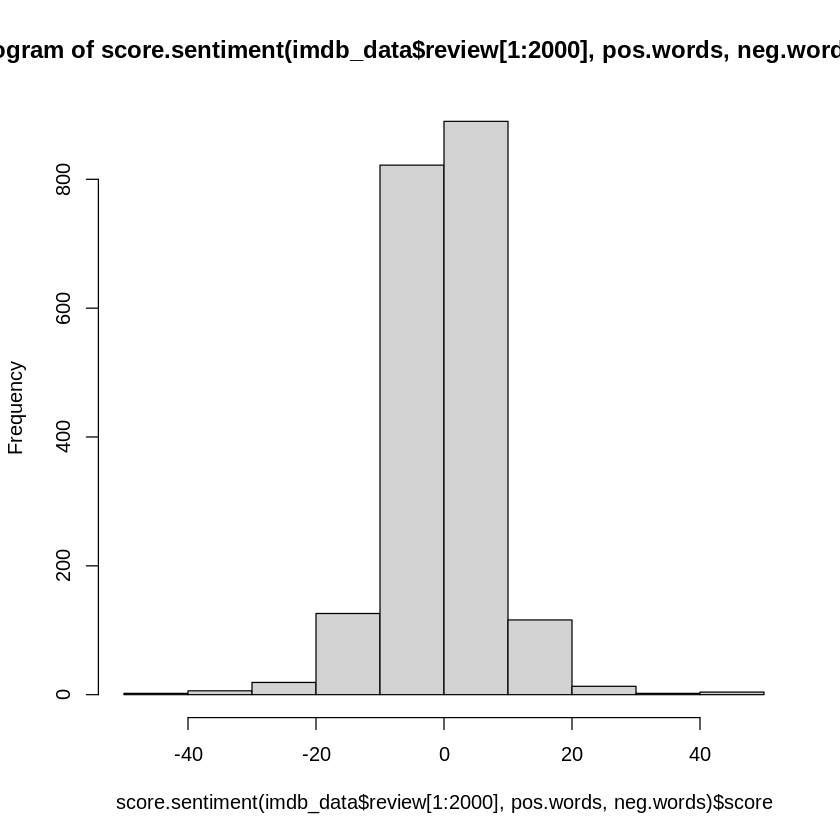

In [22]:
# distribution of first 2000 reviews in imdb_data and checking the scores
hist(score.sentiment(imdb_data$review[1:2000], pos.words, neg.words)$score)

## Get the sentiment score for all reviews and match with the original sentiments

In [20]:
nrow(imdb_data)

[1] 50000

In [21]:
scores <- score.sentiment(imdb_data$review[1:nrow(imdb_data)], pos.words, neg.words)$score

In [23]:
scores

[1]  -7  10   5  -4  13   3   6  -3  -5   4   1  -2   4   2   1  -3  -4  -9
   [19]  -2   5 -11  -8   2   0   1   4   8  -2  -5 -20 -22  -5  -2  -1   1  -2
   [37]  -8  -9   2  -1   2  15  -4   1   6   9   3  -2   7  -5   5  -6   0   2
   [55]  -7   2  -7  -1   1  13   3  -5   6  -2  -1  -4  -4   6   2   0  -5   3
   [73]   0   7   2   2  -7  -8   0   0   3  -5  -6 -13 -12  -6   0  -4  -7 -14
   [91]   6  -3  15   6   4  -5   0  -3  -8   8  -4  -6   5 -20  -1   7   5 -14
  [109]  -1   8  -5  -4  -1   4  -6   2   4  -3  -2   5  -1   4   0   1 -10  -2
  [127]  -9  -4  12   3  12   4  -2  -3   2  13   1  -1  11   5  -8 -13  -6   4
  [145]  -6   9   5   5  -2 -10   5  -3  -5   0  -5  -3  -3  10   6   5   2  -2
  [163]  -6   9   6   0   3 -22   3  -3   3   1  23   4 -13  -8   4 -32  11 -12
  [181]   3   0   5  -5   3   2  -1  -5   5 -32 -13  -1   2   2  -3  -5  -1  -3
  [199]   6   0   2   9  -2   8 -10  10  -5   0   0   2  26  -3  -1  -2   5   4
  [217]  -1  -5  15   2   0  -2  19  -5  14   1  -7   3  -9   4  -5   1   6   2
  [235]  -1   7   4  -4  -2  -4   2   7  -8   2  -4   4  -9  -7  11  -3  -8  -6
  [253]   4  -9  -9   3  -2  -8  -2   2  -1   3 -16  11  -7   0  -5 -21  -5   6
  [271]   3   2   1   2  -4   4 -16 -10  -5   1   2  -9  -5 -10 -10  -4 -11  10
  [289]  16   6   5   3   2   1  15  -8 -10  14   1   0   2  -4   6   3   7   8
  [307]  12  -2   2  -2  31  -2   2  -6  -3   0   1   6  -1  -4   2   5 -27   5
  [325]  -4   8   2 -15   6   4   4   1  41   1   2  -1   2   4  -5  -5   2   8
  [343]  -2 -15   0 -15  -7   3   6  -4   3   2   1 -10   2  -8   5 -13  -2  -1
  [361] -10  -9   8  29  14   2  -2  -6   6  11   5   7   7   3 -19   1   1   3
  [379]  16 -10  -6   8   3  -2   2  -2  -2   0  -2   2   3  -4   3   9   4 -12
  [397]  -1   3  -7   7  13  -3  -6  -2   1  -3   6  -1  -7   1  34  -1  -3  -4
  [415]   3   0   0   1 -11   1 -11  -1   1   9  -2   5   5  14  -6  13 -14 -21
  [433]  -9  10  -1  11   5   0  -5   5  -7   9   4   0  -4   2  -3   6  -1  -2
  [451]   3  -1  -4  -1   0  13 -41   7  -3   1  -3  10  -1   3  -8 -11   5  11
  [469]  -2   3   7  -5   2  -8   2  11   7 -16   1  12   2  -2  -1   0  -2 -10
  [487]  -8  10  -3 -16   0  -1  -2   2   9 -13  -1   1  -4   3   5   3   8  -5
  [505]   8   3   1  13   5   0  -5   0  -4  -1 -17   9  -2   7   1  -8   5   5
  [523]   1 -37   1  -5   4   0  -6  -3  -6   2   4  -1   0 -12  -9   0  -4  11
  [541]   6  -4  -4  -9   8  -2  -4   3  -5   2  -5   2  10   1 -13  -1   9  -4
  [559]  16 -20  -6   3  -2   3   2  -7  29  -9  -1  -7  10   4  13   4   0   0
  [577]  -8  -6  -6   6   2  13   6  -1   2   3   4 -11   5  -3  20 -15  18   5
  [595]   1   2  -6  13  11  -1  -4   4  -2  -2   2   0   2   9  14   2  -1 -13
  [613]  -7  -7  -2  -2  14  -6 -17   6  13   2   9   2  -3  -1  10  -3  -6   2
  [631]  -1   9  12   2   5 -10   4 -12   3  -2   2   7 -11   4  -2   8  -6   7
  [649]   4   0   9   8   0   1 -22  -1   6   3   4  -1  -3   7   2   7   2   0
  [667]   1   3  -6  13   4  -1  22  -6  -4  -9   6   9 -14  -9   6   3   4   1
  [685] -14  -2   7 -10  -7   5  -4  -1  -3   1  -1 -14   5   7   0  -6   0   6
  [703] -15  11  -8   2  13   1  -3   0   5   0  15  -1   5  -3   3  -5   2   5
  [721]   0  -7   7  27   4   1   6  -5   1  -2   5   0   0   1   6  -1 -14  -5
  [739]   0   4  -3   7  -2   4  -6   2  10   9 -12  12  -2 -14   4   1   2  -2
  [757]  -2 -13  -7  -6   2  -3 -11   0 -10 -27   3  -5   1  -8   3  -1  -1  10
  [775]   0   0  -2   1  -1   3   2  11   4 -11  -8  -2  -7   0   5   1  -4  -1
  [793]  12   2  -6   9   1   8  -1  -6   5   4  -4   8   4  -7  -5  -1   5  -5
  [811]   0   7   3   1  20   1   5   7   7   3   8   0   8   4 -32  18   6   0
  [829] -21  -6  10   5  22  -2   3  -2   1   4   1   0   8 -11   8  -4   4  -2
  [847]   1  -3  -5   4   1  -2   7   6   3   4   2  -6   5  -4  -1  -4  -3   3
  [865]   0  -4   8  -1   3   1  -6   2   2   2  10   3   4  -3   5 -19  -3   2
  [883]  -2  -3   2  -5  -5   3   4  -5   0  10  13   3   7  -4  10   1  -6   0
  [9

In [24]:
# Create a new vector with signs
sign_vector <- ifelse(scores > 0, "positive", ifelse(scores < 0, "negative", "neutral"))

# Print the new vector
sign_vector

[1] "negative" "positive" "positive" "negative" "positive" "positive"
    [7] "positive" "negative" "negative" "positive" "positive" "negative"
   [13] "positive" "positive" "positive" "negative" "negative" "negative"
   [19] "negative" "positive" "negative" "negative" "positive" "neutral" 
   [25] "positive" "positive" "positive" "negative" "negative" "negative"
   [31] "negative" "negative" "negative" "negative" "positive" "negative"
   [37] "negative" "negative" "positive" "negative" "positive" "positive"
   [43] "negative" "positive" "positive" "positive" "positive" "negative"
   [49] "positive" "negative" "positive" "negative" "neutral"  "positive"
   [55] "negative" "positive" "negative" "negative" "positive" "positive"
   [61] "positive" "negative" "positive" "negative" "negative" "negative"
   [67] "negative" "positive" "positive" "neutral"  "negative" "positive"
   [73] "neutral"  "positive" "positive" "positive" "negative" "negative"
   [79] "neutral"  "neutral"  "positive" "negative" "negative" "negative"
   [85] "negative" "negative" "neutral"  "negative" "negative" "negative"
   [91] "positive" "negative" "positive" "positive" "positive" "negative"
   [97] "neutral"  "negative" "negative" "positive" "negative" "negative"
  [103] "positive" "negative" "negative" "positive" "positive" "negative"
  [109] "negative" "positive" "negative" "negative" "negative" "positive"
  [115] "negative" "positive" "positive" "negative" "negative" "positive"
  [121] "negative" "positive" "neutral"  "positive" "negative" "negative"
  [127] "negative" "negative" "positive" "positive" "positive" "positive"
  [133] "negative" "negative" "positive" "positive" "positive" "negative"
  [139] "positive" "positive" "negative" "negative" "negative" "positive"
  [145] "negative" "positive" "positive" "positive" "negative" "negative"
  [151] "positive" "negative" "negative" "neutral"  "negative" "negative"
  [157] "negative" "positive" "positive" "positive" "positive" "negative"
  [163] "negative" "positive" "positive" "neutral"  "positive" "negative"
  [169] "positive" "negative" "positive" "positive" "positive" "positive"
  [175] "negative" "negative" "positive" "negative" "positive" "negative"
  [181] "positive" "neutral"  "positive" "negative" "positive" "positive"
  [187] "negative" "negative" "positive" "negative" "negative" "negative"
  [193] "positive" "positive" "negative" "negative" "negative" "negative"
  [199] "positive" "neutral"  "positive" "positive" "negative" "positive"
  [205] "negative" "positive" "negative" "neutral"  "neutral"  "positive"
  [211] "positive" "negative" "negative" "negative" "positive" "positive"
  [217] "negative" "negative" "positive" "positive" "neutral"  "negative"
  [223] "positive" "negative" "positive" "positive" "negative" "positive"
  [229] "negative" "positive" "negative" "positive" "positive" "positive"
  [235] "negative" "positive" "positive" "negative" "negative" "negative"
  [241] "positive" "positive" "negative" "positive" "negative" "positive"
  [247] "negative" "negative" "positive" "negative" "negative" "negative"
  [253] "positive" "negative" "negative" "positive" "negative" "negative"
  [259] "negative" "positive" "negative" "positive" "negative" "positive"
  [265] "negative" "neutral"  "negative" "negative" "negative" "positive"
  [271] "positive" "positive" "positive" "positive" "negative" "positive"
  [277] "negative" "negative" "negative" "positive" "positive" "negative"
  [283] "negative" "negative" "negative" "negative" "negative" "positive"
  [289] "positive" "positive" "positive" "positive" "positive" "positive"
  [295] "positive" "negative" "negative" "positive" "positive" "neutral" 
  [301] "positive" "negative" "positive" "positive" "positive" "positive"
  [307] "positive" "negative" "positive" "negative" "positive" "negative"
  [313] "positive" "negative" "negative" "neutral"  "positive" "positive"
  [319] "negative" "negative" "positive" "positive" "negative" "positive"
  [325] 

## Add the sentiments in IMDB dataset

In [25]:
imdb_data$determined_sentiment <- sign_vector

In [26]:
head(imdb_data, 5)

,review,sentiment,determined_sentiment
,<chr>,<chr>,<chr>
1,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive,negative
2,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive,positive
3,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive,positive
4,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap o

## Create a function to find how many sentiments match with original sentiments from the IMDB dataset

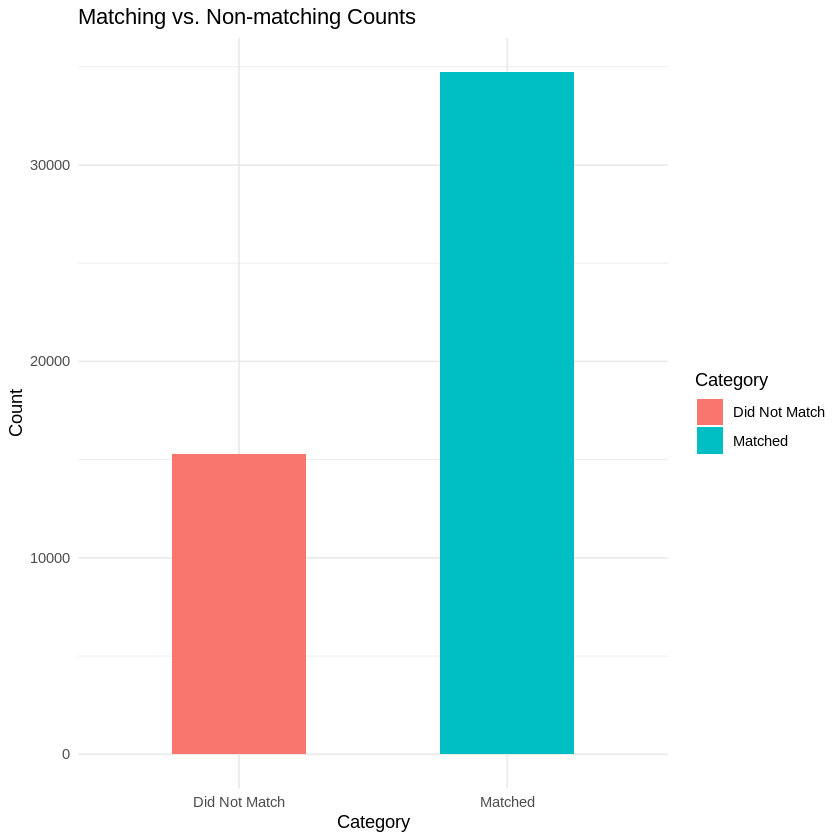

In [27]:
# Create a function to check matching values
check_match <- function(dataframe) {
  # Initialize variables to store counts
  matched_count <- 0
  did_not_match_count <- 0

  # Iterate through the dataframe
  for (i in 1:nrow(dataframe)) {
    if (dataframe[i, 2] == dataframe[i, 3]) {
      matched_count <- matched_count + 1
    } else {
      did_not_match_count <- did_not_match_count + 1
    }
  }

  # Create a data frame to store the counts
  match_data <- data.frame(
    Category = c("Matched", "Did Not Match"),
    Count = c(matched_count, did_not_match_count)
  )

  return(match_data)
}

# Create the dataframe
df <- imdb_data

# Call the function to get match counts
match_data <- check_match(df)

# Create a bar chart
ggplot(match_data, aes(x = Category, y = Count, fill = Category)) +
  geom_bar(stat = "identity", width = 0.5) +
  theme_minimal() +
  labs(title = "Matching vs. Non-matching Counts", x = "Category", y = "Count")


## Use readHTMLTable to read all tables from an HTML web page



In [ ]:
#acsi.url = 'https://www.theacsi.org/industries/travel/airlines'

theurl <- getURL("https://en.wikipedia.org/wiki/List_of_airlines_of_the_United_States",.opts = list(ssl.verifypeer = FALSE) )
tables <- readHTMLTable(theurl)
tables <- list.clean(tables, fun = is.null, recursive = FALSE)
n.rows <- unlist(lapply(tables, function(t) dim(t)[1]))
tables

V1,V2,V3,V4,V5,V6,V7,V8
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Airline,Image,IATA,ICAO,Callsign,"Primary hubs, secondary hubs",Founded,Notes
Alaska Airlines,,AS,ASA,ALASKA,Seattle/TacomaAnchoragePortland (OR)San FranciscoLos Angeles,1932,Founded as McGee Airways and commenced operations in 1944 as Alaska Airlines.
Allegiant Air,,G4,AAY,ALLEGIANT,Las VegasCincinnatiFort Walton BeachIndianapolisOrlando/SanfordMemphisPittsburghBellinghamDes MoinesPunta GordaGrand Rapids,1997,Founded as WestJet Express and began operations in 1998 as Allegiant Air.
American Airlines,,AA,AAL,AMERICAN,Dallas/Fort WorthCharlotteChicago-O'HareLos AngelesMiamiNew York-JFKNew York-LaGuardiaPhiladelphiaPhoenix-Sky HarborWashington-National,1926,"Founded as American Airways and commenced operations in 1936 as American Air Lines; largest airline in the world based on airline company revenue, scheduled passenger miles flown (per year), and fleet size."
Avelo Airlines,,XP,VXP,AVELO,BurbankNew HavenOrlandoRaleigh/DurhamWilmington Airport (Delaware),1987,"First did business as Casino Express Airlines and commenced operations in 1989. Started scheduled service in Burbank, CA, April 28, 2021."
Breeze Airways,,MX,MXY,MOXY,CharlestonHartfordNew OrleansNorfolkProvidenceProvoTampa,2018,Founded as Moxy Airways but was renamed due to copyright issues
Delta Air Lines,,DL,DAL,DELTA,AtlantaBostonDetroitLos AngelesMinneapolis/St. PaulNew York-JFKNew York-LaGuardiaSalt Lake CitySeattle/Tacoma,1924,Founded as Huff Daland Dusters and commenced operations in 1929 as Delta Air Service.
Eastern Airlines,,2D,EAL,EASTERN,Miami,2010,
Frontier Airlines,,F9,FFT,FRONTIER FLIGHT,DenverAtlantaChicago-O'HareCincinnatiClevelandLas VegasMiamiOrlandoPhiladelphiaRaleigh/Durham,1994,


## Check the first table (US main airlines)

In [ ]:
tables[1]

V1,V2,V3,V4,V5,V6,V7,V8
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Airline,Image,IATA,ICAO,Callsign,"Primary hubs, secondary hubs",Founded,Notes
Alaska Airlines,,AS,ASA,ALASKA,Seattle/TacomaAnchoragePortland (OR)San FranciscoLos Angeles,1932,Founded as McGee Airways and commenced operations in 1944 as Alaska Airlines.
Allegiant Air,,G4,AAY,ALLEGIANT,Las VegasCincinnatiFort Walton BeachIndianapolisOrlando/SanfordMemphisPittsburghBellinghamDes MoinesPunta GordaGrand Rapids,1997,Founded as WestJet Express and began operations in 1998 as Allegiant Air.
American Airlines,,AA,AAL,AMERICAN,Dallas/Fort WorthCharlotteChicago-O'HareLos AngelesMiamiNew York-JFKNew York-LaGuardiaPhiladelphiaPhoenix-Sky HarborWashington-National,1926,"Founded as American Airways and commenced operations in 1936 as American Air Lines; largest airline in the world based on airline company revenue, scheduled passenger miles flown (per year), and fleet size."
Avelo Airlines,,XP,VXP,AVELO,BurbankNew HavenOrlandoRaleigh/DurhamWilmington Airport (Delaware),1987,"First did business as Casino Express Airlines and commenced operations in 1989. Started scheduled service in Burbank, CA, April 28, 2021."
Breeze Airways,,MX,MXY,MOXY,CharlestonHartfordNew OrleansNorfolkProvidenceProvoTampa,2018,Founded as Moxy Airways but was renamed due to copyright issues
Delta Air Lines,,DL,DAL,DELTA,AtlantaBostonDetroitLos AngelesMinneapolis/St. PaulNew York-JFKNew York-LaGuardiaSalt Lake CitySeattle/Tacoma,1924,Founded as Huff Daland Dusters and commenced operations in 1929 as Delta Air Service.
Eastern Airlines,,2D,EAL,EASTERN,Miami,2010,
Frontier Airlines,,F9,FFT,FRONTIER FLIGHT,DenverAtlantaChicago-O'HareCincinnatiClevelandLas VegasMiamiOrlandoPhiladelphiaRaleigh/Durham,1994,


## Check the second table (US regional airlines)

In [ ]:
tables[2]

V1,V2,V3,V4,V5,V6,V7,V8
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Airline,Image,IATA,ICAO,Callsign,"Primary hubs, secondary hubs",Founded,Notes
Air Wisconsin,,ZW,AWI,WISCONSIN,Chicago-O'HareWashington-Dulles,1965,Operates as American Eagle[1]
Cape Air,,9K,KAP,CAIR,HyannisBillingsBostonNantucketSt. LouisSan Juan AlbanyMartha's Vineyard,1988,
CommutAir,,C5,UCA,COMMUTAIR,DenverNewarkWashington-Dulles,1989,Operates as United Express.
Contour Airlines,,LF,VTE,VOLUNTEER,Smyrna (TN),1982,
Elite Airways,,7Q,MNU,MAINER,Melbourne/OrlandoNewarkPortland (Maine),2006,Commenced operations in 2014.
Endeavor Air,,9E,EDV,ENDEAVOR,Minneapolis/St. PaulAtlanta CincinnatiDetroitNew York-JFKNew York-LaGuardia,1985,Founded as Express Airlines I. Operates as Delta Connection.
Envoy Air,,MQ,ENY,ENVOY,Dallas/Fort WorthChicago-O'HareMiami,1984,Founded as American Eagle Airlines. Operates as American Eagle.
GoJet Airlines,,G7,GJS,LINDBERGH,Chicago-O'HareDenver,2004,Commenced operations in 2005. Operates as United Express.
